### Spatial Modeling and Analytics

## Part 3 of 4
# How does it work?

## Reminder
<a href="#/slide-2-0" class="navigate-right" style="background-color:blue;color:white;padding:8px;margin:2px;font-weight:bold;">Continue with the lesson</a>

<br>
</br>
<font size="+1">

By continuing with this lesson you are granting your permission to take part in this research study for the Hour of Cyberinfrastructure: Developing Cyber Literacy for GIScience project. In this study, you will be learning about cyberinfrastructure and related concepts using a web-based platform that will take approximately one hour per lesson. Participation in this study is voluntary.

Participants in this research must be 18 years or older. If you are under the age of 18 then please exit this webpage or navigate to another website such as the Hour of Code at https://hourofcode.com, which is designed for K-12 students.

If you are not interested in participating please exit the browser or navigate to this website: http://www.umn.edu. Your participation is voluntary and you are free to stop the lesson at any time.

For the full description please navigate to this website: <a href="../../gateway-lesson/gateway/gateway-1.ipynb">Gateway Lesson Research Study Permission</a>.

</font>

In [1]:
# This code cell starts the necessary setup for Hour of CI lesson notebooks.
# First, it enables users to hide and unhide code by producing a 'Toggle raw code' button below.
# Second, it imports the hourofci package, which is necessary for lessons and interactive Jupyter Widgets.
# Third, it helps hide/control other aspects of Jupyter Notebooks to improve the user experience
# This is an initialization cell
# It is not displayed because the Slide Type is 'Skip'

from IPython.display import HTML, IFrame, Javascript, display
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import Layout

import getpass # This library allows us to get the username (User agent string)

# import package for hourofci project
import sys
sys.path.append('../../supplementary') # relative path (may change depending on the location of the lesson notebook)
import hourofci


import warnings
warnings.filterwarnings('ignore') # Hide warnings

# load javascript to initialize/hide cells, get user agent string, and hide output indicator
# hide code by introducing a toggle button "Toggle raw code"
HTML(''' 
    <script type="text/javascript" src=\"../../supplementary/js/custom.js\"></script>
    
    <input id="toggle_code" type="button" value="Toggle raw code">
''')

In this section we’ll see how to use some basic spatial concepts to answer spatial questions. 

*If you haven’t heard about spatial concepts and spatial questions before, you might want to complete the Spatial Thinking Lesson before going further here.*

Remember these spatial questions from earlier in this lesson?

- How many coffee shops are within 250 meters of where I am?
- Where is the nearest coffee shop?
- What is the distance between that coffee shop and my favorite grocery store?
- What is the shortest route between the coffee shop and the grocery store?
- Determining distance is perhaps the most basic calculation we have to do in spatial analytics.


In order to calculate distance in the computer we have to have some spatial data. Let’s go get some!

Earlier in this lesson, we used some coffee shop data from the <a href="https://www.openstreetmap.org/">Open Street Map Project</a> which is a massive source of geographic data about streets and points of interest collected by volunteers around the world. This crowd-sourced data is deep and rich, but it is somewhat unreliable and incomplete. So use it and results from it with some caution. 

The python package <a href="https://osmnx.readthedocs.io/en/stable/">OSMNX</a> (imported as "os") lets you "download geospatial data from Open Street Map and model, project, visualize, and analyze real-world street networks and any other geospatial geometries." It's a very large package with lots of spatial analysis tools specially for modeling on networks, but we're just going to use it here to download data from Open Street Map. 

So first we import the packages we need.

In [2]:
import osmnx as ox 
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

Now let's get some spatial data about coffee shops (identified as amenity=cafe and cuisine=coffee-shop) in Minneapolis. Run this code, then look through the output to see what kind of information is collected for OSM features.

In [3]:
tags = {"amenity": "cafe", "cuisine": "coffee-shop"} 
coffee_shops = ox.geometries_from_place("Minneapolis, MN", tags) 
coffee_shops.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 141 entries, ('node', 319434041) to ('way', 988165776)
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   amenity                141 non-null    object  
 1   cuisine                95 non-null     object  
 2   name                   139 non-null    object  
 3   geometry               141 non-null    geometry
 4   addr:city              73 non-null     object  
 5   addr:country           3 non-null      object  
 6   addr:housenumber       89 non-null     object  
 7   addr:postcode          75 non-null     object  
 8   addr:state             62 non-null     object  
 9   addr:street            91 non-null     object  
 10  atm                    2 non-null      object  
 11  drive_through          5 non-null      object  
 12  internet_access        35 non-null     object  
 13  opening_hours          49 non-null     object  
 14  o

When we built this lesson, we got 140 coffee shops. Is that what you got? (Go back to the previous page and see how many "entries" you got.) If your number is different, it means that the active OSMers in Minneapolis have been updating their data. That's good!

Now, let's look at what data we've got in the dataframe. Most importantly, is there a column that always provides the location of each coffee shop? (Hint: note that address cells are often empty.)

In [4]:
coffee_shops.head()

amenity           cuisine               name  \
element_type osmid                                                    
node         319434041    cafe       coffee_shop      Corner Coffee   
             343298976    cafe  coffee_shop;cafe  Purple Onion Café   
             478479502    cafe               NaN          Dunn Bros   
             478479503    cafe       coffee_shop      Milkweed Cafe   
             562529853    cafe               NaN       May Day Cafe   

                                          geometry    addr:city addr:country  \
element_type osmid                                                             
node         319434041  POINT (-93.27626 44.98576)          NaN          NaN   
             343298976  POINT (-93.23755 44.98014)  Minneapolis           US   
             478479502  POINT (-93.20611 44.94855)          NaN          NaN   
             478479503  POINT (-93.21675 44.94854)  Minneapolis          NaN   
             562529853  POINT (-93.25265 44.93988)          NaN          NaN   

                       addr:housenumber addr:postcode addr:state  \
element_type osmid                                                 
node         319434041              NaN           NaN        NaN   
             343298976             1301         55414         MN   
             478479502              NaN           NaN        NaN   
             478479503             3822         55406         MN   
             562529853             3440           NaN        NaN   

                                        addr:street  ... building note  \
element_type osmid                                   ...                 
node         319434041                          NaN  ...      NaN  NaN   
             343298976  Southeast University Avenue  ...      NaN  NaN   
             478479502                          NaN  ...      NaN  NaN   
             478479503             East Lake Street  ...      NaN  NaN   
             562529853     Bloomington Avenue South  ...      NaN  NaN   

                       start_date building:levels shop was:name roof:levels  \
element_type osmid                                                            
node         319434041        NaN             NaN  NaN      NaN         NaN   
             343298976        NaN             NaN  NaN      NaN         NaN   
             478479502        NaN             NaN  NaN      NaN         NaN   
             478479503        NaN             NaN  NaN      NaN         NaN   
             562529853        NaN             NaN  NaN      NaN         NaN   

                       addr:unit  ref room  
element_type osmid                          
node         319434041       NaN  NaN  NaN  
             343298976       NaN  NaN  NaN  
             478479502       NaN  NaN  NaN  
             478479503       NaN  NaN  NaN  
             562529853       NaN  NaN  NaN  

[5 rows x 62 columns]

In [6]:
user_agent = getpass.getuser()
lesson = 'spatial-modeling-analytics'
lesson_level = 'beginner'
print('What is the name of the column that always contains a spatial location for these features?')
text1 = widgets.Text( placeholder='Type your answer here...')
# Display widget
display(text1)

# Output function
def out1():
    print("Your answer is successfully submitted!")
    
# Submit button
hourofci.SubmitBtn(user_agent, lesson, lesson_level, "4A", text1, out1)

What is the name of the column that always contains a spatial location for these features?


Text(value='', placeholder='Type your answer here...')

Button(description='Submit', icon='check', layout=Layout(height='auto', width='auto'), style=ButtonStyle())

Output()

## It's geometry!
<table>
    <tr style="background: #fff">       
        <td width=30%> <a title="Dixy52, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Cartesian_coordinate.svg"><img width="512" alt="Cartesian coordinate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Cartesian_coordinate.svg/512px-Cartesian_coordinate.svg.png"></a></td>
        <td align=left valign=top>
In spatial data, the location of points (such as cities on a national map, bus stops on a neighborhood map or weather stations) is often specified by a coordinate pair, such as (lat,long) or (x,y), or a series of pairs for lines or area boundaries. This geometry allows us to do spatial analysis. So, having a geometry column in our dataframe is essential. 

(There are other ways to record location, but coordinate pairs are by far the most common. For more on how we specify location, complete the Geospatial Data Lesson.)

Remember from grade school geometry, Cartesian coordinates is how we plot points on a graph. One coordinate measures the distance from a point of origin horizontally (or East-West), the other vertically (or North-South). Latitude is the N-S measurement and longitude is the E-W measurement.</td>
    </tr>
</table>

<small>Image via Wikimedia Commons by <a href="https://commons.wikimedia.org/wiki/File:Cartesian_coordinate.svg">Dixy52</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>

Once we know we've got the location data, then we can make a plot.

<AxesSubplot:>

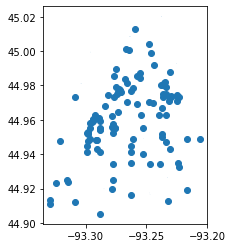

In [7]:
coffee_shops.plot()

Good, now we've got lots of useful geospatial data. 

## *Can we start doing spatial analysis?* 
## *Can we figure out the distance between points?* 

Soon, but first we have to make a slight diversion into geospatial data concepts. Just a quick explanation here. If you are interested in more, be sure to complete the Intermediate Geospatial Data lesson. 

Like most geospatial data you find on the web, the geometry in OSM is provided in angular Lat/Long coordinates, measured in degrees. (Look at the axis labels in the plot above.)

In order to find coordinates on the spherical earth we use an <i>angular</i> measurement system that produces the coordinates *latitude and longitude*. 

<table>
    <tr style="background: #fff">
       <td width=30%><img src='supplementary/globelatlong.jpg' alt='Latitude and Longitude'></td> 
        <td>Latitude is the angle north or south of the plane of the equator.<br><br>Longitude is the angle east and west of the prime meridian (runs through Greenwich England).</td>
    </tr>
</table>

<small>Image source <a href="https://openstax.org/details/books/calculus-volume-3">openstax</a></small>

These are not the rectangular measurements we need for doing Cartesian geometry. 

Thus we need to transform these angular lat/long values to rectangular UTM (universal transverse mercator) values, stated in meters. (You'll learn about UTM in the Intermediate Geospatial Data Lesson.)

Fortunately, there's a simple-to-use coordinate reference system (CRS) transformation function built into our tools. Let's run it now and get on with our spatial analysis! Note the change in values in the geometry column. 

In [8]:
warnings.filterwarnings('ignore') # Hide warnings
coffee_shopsUTM = coffee_shops.to_crs('epsg:3174')
coffee_shopsUTM.head(1)

,,amenity,cuisine,name,geometry,addr:city,addr:country,addr:housenumber,addr:postcode,addr:state,addr:street,...,building,note,start_date,building:levels,shop,was:name,roof:levels,addr:unit,ref,room
element_type,osmid,,,,,,,,,,,,,,,,,,,,,
node,319434041,cafe,coffee_shop,Corner Coffee,POINT (306971.389 973129.746),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OK, now our coordinates are suitable for doing geometry. 

So how can we figure out the distance between points? 

One way is to do this visually. Using those coordinate pairs, we can make a map of this data. Then we can manually eyeball the distance between two points with our thumbs and compare that distance with the scale bar. 

On the next slide, you can figure out how far apart are the first two shops in the table (our points A and B). The scale bar is in meters. Then record your answer on the following slide.

We extract just the first two rows of the table and plot the points, along with a scale bar. Then you can estimate the distance between them. 

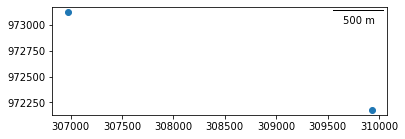

In [9]:
warnings.filterwarnings('ignore') # Hide warnings
AandB = coffee_shopsUTM.head(2)
ax = AandB.plot()  
ax.add_artist(ScaleBar(1))
plt.show()

In [11]:
# print('Which of these following situations demonstrate Tobler’s First Law of Geography?')
# Multiple choice question
widget2 = widgets.RadioButtons(
    options = ['1 km', '3 km', '5 km', '100 km'],
    description = 'I guess the distance between the two points is (about): ', style={'description_width': 'initial'},
    layout = Layout(width='100%'),
    value = None
)

display(widget2)

hourofci.SubmitBtn(user_agent,lesson,lesson_level,'4B',widget2)


RadioButtons(description='I guess the distance between the two points is (about): ', layout=Layout(width='100%…

Button(description='Submit', icon='check', layout=Layout(height='auto', width='auto'), style=ButtonStyle())

Output()

And the answer is (in meters):

In [24]:
dist_ab = AandB.iloc[0].geometry.distance(AandB.iloc[1].geometry)
print('The distance between the two points is', int(dist_ab),'m or', round(dist_ab/1000 ,3), 'km')
     

The distance between the two points is 3111 m or 3.111 km


OK, that was easy enough, but what if you wanted to figure the distance between every city and every other 
city on a national map? That’s a lot of eyeballing.

Let’s figure out how to do this using the coordinate pair data and geometry.


Remember the Pythagorean theorem?

<table>
    <tr style="background: #fff">
        <td width=30%><img src='supplementary/sma4-8.png' alt='Pythagorean'></td> 
        <td><a href = 'https://en.wikipedia.org/wiki/Pythagorean_theorem'>Wikipedia</a> says the Pythagorean Theorem proves that:

*The length of the hypotenuse of a right angled triangle is equal to the square root of the sum of the squares of the other two sides.*

Take a look at that Wikipedia article, very interesting! The pythagorean theorem is a BIG deal!</td>
    </tr>
</table>

<small>Image source https://commons.wikimedia.org/wiki/File:Pythagoras_Euclid.svg

## Sidenote

<table>
    <tr style="background: #fff">
        <td width=20%><img src='supplementary/sma4-9.png' alt='Babylonian tablet with theorem'></td>
        <td>This is an ancient theorem. According to that Wikipedia article, “historians of Mesopotamian mathematics have concluded that the Pythagorean rule was in widespread use during the Old Babylonian period (20th to 16th centuries BC), over a thousand years before Pythagoras was born”. This is an image of a Babylonian tablet with the theorem inscribed.

Wow, they knew how to do things like this way back then?????</td>
    </tr>
<table>

<small>Image by Osama Shukir Muhammed Amin FRCP(Glasg) - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=90609207

Maybe you remember the equation?

If *c* denotes the length of the hypotenuse and *a* and *b* denote the lengths of the other two sides, the Pythagorean theorem can be expressed as the Pythagorean equation:
<center><img src='supplementary/sma4-10-1.png' alt='Pythagorean' width = 150>
  
If the lengths of both *a* and *b* are known, then *c* can be calculated as  
<center><img src='supplementary/sma4-10-2.png' alt='Pythagorean' width = 150>

If we calculate *a* by finding the distance between the x coordinates and *b* by the distance between the y coordinates, then the length of the hypotenuse is the distance between the points!

Perfect! Now all we have to do is to get the computer to understand those equations. 

Hmm, computers generally can’t read mathematical symbols and programming languages usually need to be coded in simple ASCII text (the roman alphabet plus numbers 0-9).

For that we need an *algorithm*.

What’s an algorithm, you say?

Read on...


## Definition of Algorithm

<a href = 'https://en.wikipedia.org/wiki/Algorithm'>Wikipedia</a> says an algorithm is “a finite sequence of well-defined, computer-implementable instructions, typically to solve a class of problems or to perform a computation.”

and

“Algorithms are always unambiguous and are used as specifications for performing calculations, data processing, automated reasoning, and other tasks.”

Again, the Wikipedia article on this topic is also very interesting and it gives several examples of algorithms to help you get the idea. 

## Algorithm for calculating distance between two points


And here it is: 
1. Get two points as an input as A (x1,y1) and B (x2,y2)
2. Calculate the difference between the x-coordinates
3. Calculate the difference between the y-coordinates
4. Apply the formula derived from Pythagorean Theorem


And now, let’s see what that looks like in Python.

In [25]:
# Extract the variables from the dataframe
x1 = AandB.iloc[0].geometry.x
y1 = AandB.iloc[0].geometry.y
x2 = AandB.iloc[1].geometry.x
y2 = AandB.iloc[1].geometry.y

# Use Pythagorean Theorem
dist = ((x2-x1)**2 + (y2-y1)**2)**0.5 
print("The distance between the two points is",round(dist),"meters.")

The distance between the two points is 3111 meters.


Of course, this is such a common function that it's already coded into the system. 

In [26]:
dist2 = AandB.iloc[0].geometry.distance(AandB.iloc[1].geometry)
round(dist2)

3111

Now let's try this with a bigger dataset in our Try-it #2 notebook. And we've included a bonus algorithm for calculating the area of polygons. 

Go to <a style="background-color:blue;color:white;font-weight:bold;" href="try_it2_sma.ipynb">Try it #2</a> now.